<a href="https://colab.research.google.com/github/daniswara10/TextureRecognition/blob/main/TextureRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [46]:
!pip install mahotas


In [47]:
import cv2
import numpy as np
import os
import glob
import mahotas as mt
from sklearn.svm import LinearSVC

In [89]:
# load the training dataset
train_path = "/content/drive/MyDrive/DatasetTexture/Train"
train_names = os.listdir(train_path)

# empty list to hold feature vectors and train labels
train_features = []
train_labels = []

In [90]:
def extract_features(image):
        # calculate haralick texture features for 4 types of adjacency
        textures = mt.features.haralick(image)

        # take the mean of it and return it
        ht_mean = textures.mean(axis=0)
        return ht_mean

In [92]:
# loop over the training dataset
print("[STATUS] Started extracting haralick textures..")
for train_name in train_names:
        cur_path = train_path + "/" + train_name
        cur_label = train_name
        i = 1
        for file in glob.glob(cur_path + "/*.png"):
                print("Processing Image - {} in {}".format(i, cur_label))

                # read the training image
                image = cv2.imread(file)

                # convert the image to grayscale
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

                # extract haralick texture from the image
                features = extract_features(gray)

                # append the feature vector and label
                train_features.append(features)
                train_labels.append(cur_label)

                # show loop update
                i += 1


[STATUS] Started extracting haralick textures..
Processing Image - 1 in Grass
Processing Image - 2 in Grass
Processing Image - 3 in Grass
Processing Image - 1 in Bricks
Processing Image - 2 in Bricks
Processing Image - 3 in Bricks
Processing Image - 4 in Bricks
Processing Image - 5 in Bricks
Processing Image - 6 in Bricks
Processing Image - 1 in Rocks
Processing Image - 2 in Rocks
Processing Image - 3 in Rocks
Processing Image - 4 in Rocks
Processing Image - 5 in Rocks
Processing Image - 6 in Rocks


In [93]:
# have a look at the size of our feature vector and labels
print("Training features: {}".format(np.array(train_features).shape))
print("Training labels: {}".format(np.array(train_labels).shape))


Training features: (26, 13)
Training labels: (26,)


In [94]:
# create the classifier
print("[STATUS] Creating the classifier..")
clf_svm = LinearSVC(random_state=9)

# fit the training data and labels
print("[STATUS] Fitting data/label to model..")
clf_svm.fit(train_features, train_labels)

[STATUS] Creating the classifier..
[STATUS] Fitting data/label to model..


LinearSVC(random_state=9)

Prediction - Rocks


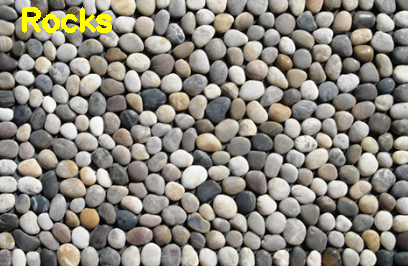

Prediction - Grass


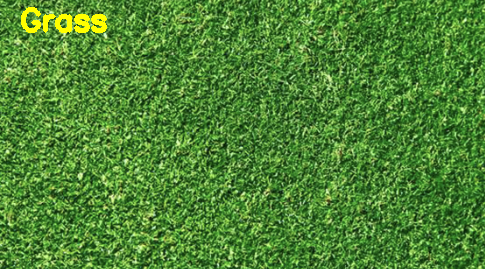

Prediction - Bricks


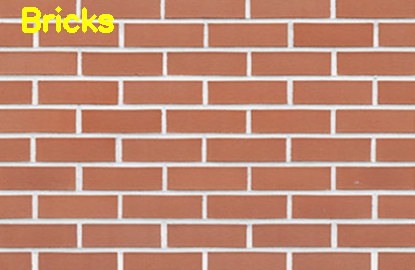

In [95]:
# loop over the test images
test_path = "/content/drive/MyDrive/DatasetTexture/Test"
for file in glob.glob(test_path + "/*.png"):
	# read the input image
	image = cv2.imread(file)

	# convert to grayscale
	gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

	# extract haralick texture from the image
	features = extract_features(gray)

	# evaluate the model and predict label
	prediction = clf_svm.predict(features.reshape(1, -1))[0]

	# show the label
	cv2.putText(image, prediction, (20,30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0,255,255), 3)
	print ("Prediction - {}".format(prediction))

	# display the output image
	cv2_imshow(image)  # Colab-friendly display!
	cv2.waitKey(0)